In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob




In [97]:
# initial parameters
epochs = 200
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

# load image files from the dataset
image_files = [f for f in glob.glob('yuz_veriseti' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

In [98]:

# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model



In [99]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [100]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 96, 96, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_36 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_43 (Activation)   (None, 32, 32, 64)       

In [101]:
# compile the model

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])


In [102]:

# train the model


history = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(testX,testY), 
                       steps_per_epoch=len(trainX) // batch_size,
                       epochs=epochs, verbose=1)


Epoch 1/200
28/28 [==============================] - 40s 1s/step - loss: 0.7479 - accuracy: 0.7355 - val_loss: 0.7242 - val_accuracy: 0.5043
Epoch 2/200
28/28 [==============================] - 43s 2s/step - loss: 0.5177 - accuracy: 0.8012 - val_loss: 1.5347 - val_accuracy: 0.5043
Epoch 3/200
28/28 [==============================] - 44s 2s/step - loss: 0.4302 - accuracy: 0.8383 - val_loss: 0.7559 - val_accuracy: 0.5000
Epoch 4/200
28/28 [==============================] - 48s 2s/step - loss: 0.4149 - accuracy: 0.8467 - val_loss: 0.6959 - val_accuracy: 0.5065
Epoch 5/200
28/28 [==============================] - 45s 2s/step - loss: 0.3630 - accuracy: 0.8579 - val_loss: 1.3024 - val_accuracy: 0.5043
Epoch 6/200
28/28 [==============================] - 49s 2s/step - loss: 0.3157 - accuracy: 0.8832 - val_loss: 1.7034 - val_accuracy: 0.5043
Epoch 7/200
28/28 [==============================] - 46s 2s/step - loss: 0.2899 - accuracy: 0.8916 - val_loss: 2.1803 - val_accuracy: 0.5043
Epoch 8/200
2

Epoch 59/200
28/28 [==============================] - 40s 1s/step - loss: 0.0809 - accuracy: 0.9686 - val_loss: 0.0605 - val_accuracy: 0.9805
Epoch 60/200
28/28 [==============================] - 39s 1s/step - loss: 0.0553 - accuracy: 0.9787 - val_loss: 0.2545 - val_accuracy: 0.9113
Epoch 61/200
28/28 [==============================] - 40s 1s/step - loss: 0.0631 - accuracy: 0.9747 - val_loss: 0.2719 - val_accuracy: 0.9307
Epoch 62/200
28/28 [==============================] - 40s 1s/step - loss: 0.0588 - accuracy: 0.9775 - val_loss: 0.0522 - val_accuracy: 0.9719
Epoch 63/200
28/28 [==============================] - 39s 1s/step - loss: 0.0464 - accuracy: 0.9809 - val_loss: 0.0365 - val_accuracy: 0.9870
Epoch 64/200
28/28 [==============================] - 40s 1s/step - loss: 0.0514 - accuracy: 0.9803 - val_loss: 0.2190 - val_accuracy: 0.9481
Epoch 65/200
28/28 [==============================] - 39s 1s/step - loss: 0.0615 - accuracy: 0.9770 - val_loss: 0.2147 - val_accuracy: 0.9394
Epoch 

28/28 [==============================] - 48s 2s/step - loss: 0.0279 - accuracy: 0.9899 - val_loss: 0.1215 - val_accuracy: 0.9567
Epoch 174/200
28/28 [==============================] - 48s 2s/step - loss: 0.0277 - accuracy: 0.9899 - val_loss: 0.0724 - val_accuracy: 0.9762
Epoch 175/200
28/28 [==============================] - 48s 2s/step - loss: 0.0192 - accuracy: 0.9944 - val_loss: 0.1016 - val_accuracy: 0.9784
Epoch 176/200
28/28 [==============================] - 48s 2s/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.1840 - val_accuracy: 0.9416
Epoch 177/200
28/28 [==============================] - 47s 2s/step - loss: 0.0229 - accuracy: 0.9933 - val_loss: 0.1109 - val_accuracy: 0.9675
Epoch 178/200
28/28 [==============================] - 47s 2s/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.4599 - val_accuracy: 0.8377
Epoch 179/200
28/28 [==============================] - 52s 2s/step - loss: 0.0365 - accuracy: 0.9865 - val_loss: 0.2398 - val_accuracy: 0.9437
Epoch 180/200

NameError: name 'history' is not defined

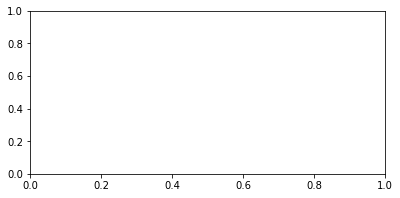

In [1]:
from matplotlib import pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [2]:
model.save('yuz_tanima.model')


NameError: name 'model' is not defined

In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv
import imutils
                    
# load model
model = load_model('yuz_tanima.model')

# open webcam
webcam = cv2.VideoCapture(0)
#w=webcam.get(3)
#h=webcam.get(4)

#yukarı_cizgi=int(1.35*(w/2.7))
#asagı_cizgi=int(2.5*(w/3.3))

#print ("Red line y:",str(yukarı_cizgi))
#print ("Blue line y:", str(asagı_cizgi))

cizgi_color=(40,40,160)
cizgi2_color=(40,40,40)

pt10=[700,150]
pt11=[0,150]
pts_L10 = np.array([pt10,pt11], np.int32)
pts_L10 = pts_L10.reshape((-1,1,2))

pt1=[700,130]
pt2=[0,130]
pts_L1 = np.array([pt1,pt2], np.int32)
pts_L1 = pts_L1.reshape((-1,1,2))

classes = ['man','woman']

girenk=0;
girene=0;
a=0;


# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()
    frame = imutils.resize(frame, width=800)
    frame=frame[:, 100:]

    
    frame=cv2.polylines(frame,[pts_L10],20,cizgi_color,thickness=2)
    frame=cv2.polylines(frame,[pts_L1],False,cizgi2_color,thickness=2)

    
    # apply face detection
    face, confidence = cv.detect_face(frame)


    # loop through detected faces
    for idx, f in enumerate(face):

        # get corner points of face rectangle        
        (startX, startY) = f[0], f[1]
        (endX, endY) = f[2], f[3]
        
        # draw rectangle over face
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        cv2.circle(frame, ((startX+80), (startY+80)), 2, (0,0,255), 2)
        
        text = "id"+str(idx)
        cv2.putText(frame, text, ((startX+80),(startY+80)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.70, (0, 255, 255), 2)
        
        
                
        # crop the detected face region
        face_crop = np.copy(frame[startY:endY,startX:endX])
        if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
            continue
        # preprocessing for gender detection model
        face_crop = cv2.resize(face_crop, (96,96))
        face_crop = face_crop.astype("float") / 255.0
        face_crop = img_to_array(face_crop)
        face_crop = np.expand_dims(face_crop, axis=0)

        # apply gender detection on face
        conf = model.predict(face_crop)[0] # model.predict return a 2D matrix, ex: [[9.9993384e-01 7.4850512e-05]]

        # get label with max accuracy
        idx = np.argmax(conf)
        label = classes[idx]

        label = "{}: {:.2f}%".format(label, conf[idx] * 100)

       

        # write label and confidence above face rectangle
        cv2.putText(frame, label, (startX, startY),  cv2.FONT_HERSHEY_SIMPLEX,
                   0.7, (0, 255, 0), 2)
        
        
        text = "Giren Kadin Sayisi:"+str(girenk)
        cv2.putText(frame, text, (10,30),
        cv2.FONT_HERSHEY_SIMPLEX, 0.70, (0, 255, 255), 2)
        
        
        texta = "Giren Erkek Sayisi:"+str(girene)
        cv2.putText(frame, texta, (10,60),
        cv2.FONT_HERSHEY_SIMPLEX, 0.70, (0, 255, 255), 2)
        
        
        if (startY+80)>130 and  (startY+80)<pt10[1] and (startY+80)>pt1[1] and a==1:
            a=0
        if (startY+80)<pt1[1] and a==0:
            if idx==1:
                girenk+=1
            if idx==0:
                girene+=1
            a=1
            
    # display output
    cv2.imshow("Cinsiyet tespiti", frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
      

# release resources
webcam.release()
cv2.destroyAllWindows()